(30, 2)


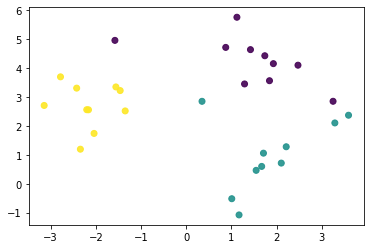

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sortedcontainers import SortedList
from datetime import datetime
from __future__ import print_function, division
from future.utils import iteritems

def get_data(limit=None):
#     df = pd.read_csv('./data/mnist-in-csv/mnist_train.csv')
    df = pd.read_csv('fashion-mnist_train.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=30, centers=3, n_features=2,
                  random_state=0)
print(X.shape)
plt.scatter(X[:,0], X[:,1],  c=y, alpha=0.9)
plt.show()

In [2]:
X, Y = get_data(1000)

In [3]:
class KNN(object):
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        y = np.zeros(len(X))
        
        for i,x in enumerate(X):
            sl = SortedList()
            for j, xt in enumerate(self.X):
                diff = x - xt
                d = diff.dot(diff)
                if(len(sl) < self.k ):
                    sl.add((d, self.y[j]))
                else:
                    if( d < sl[-1][0]):
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
 
            votes = {}
            for _, v in sl:
                votes[v] = votes.get(v, 0) + 1
            
            max_votes = 0
            max_votes_class = -1
            for v, count in iteritems(votes):
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y
        
    def score(self, X, y):
        P = self.predict(X)
        return np.mean(P == y)

In [4]:
Ntrain =500
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
train_scores = []
test_scores = []
ks = np.arange(1,4)
for k in ks:
    print(k)
    model = KNN(k)
    model.fit(Xtrain, Ytrain)
    train_score = model.score(Xtrain, Ytrain)
    train_scores.append(train_score)
    
    test_score = model.score(Xtest, Ytest )   
    test_scores.append(test_score)

1
2
3


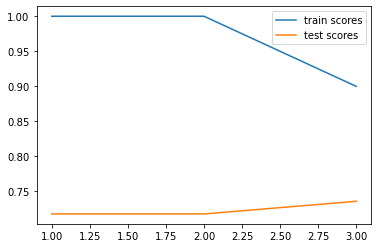

In [5]:
plt.plot(ks, train_scores, label='train scores')
plt.plot(ks, test_scores, label='test scores')
plt.legend()
plt.show()

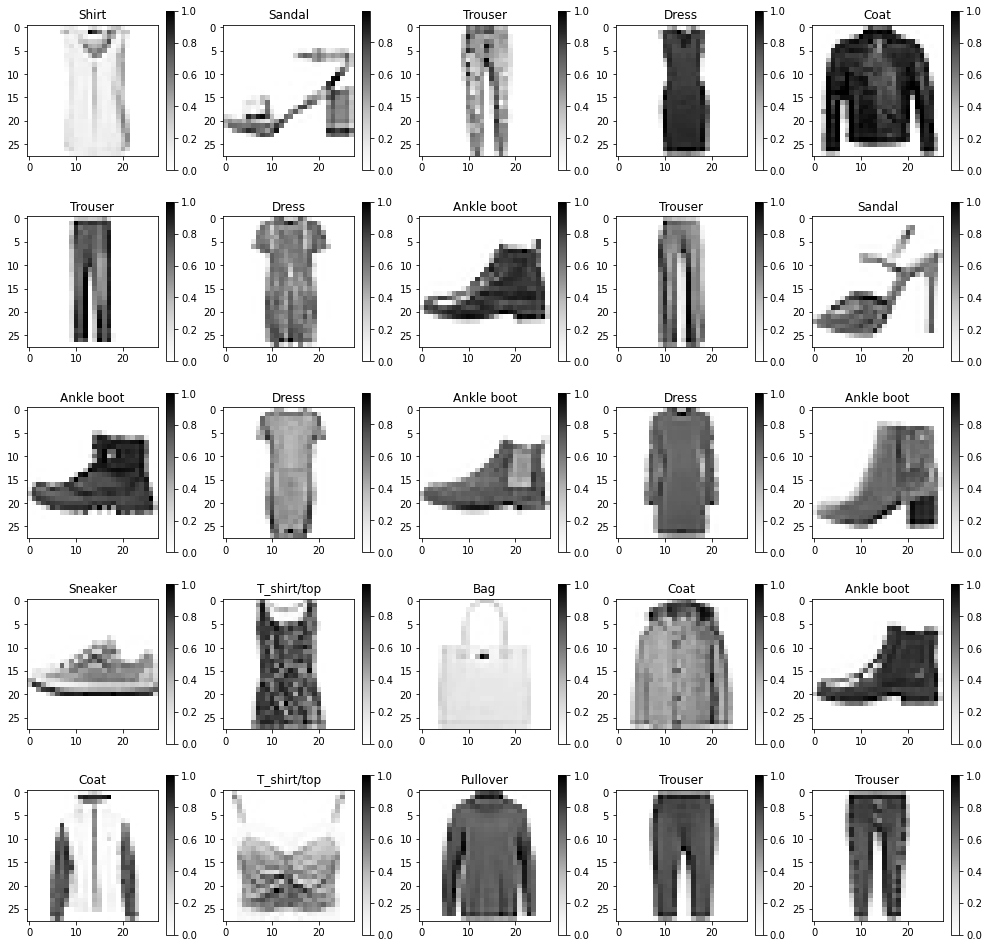

In [6]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# class_names = '0 1 2 3 4 5 6 7 8 9'.split()


plt.figure(figsize=(17, 17))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(Xtrain[i].reshape((28,28)), cmap='Greys')
    plt.colorbar()
    label_index = int(Ytrain[i])
    plt.title(class_names[label_index])
plt.show()

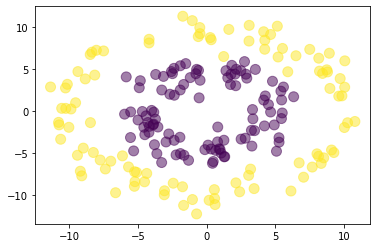

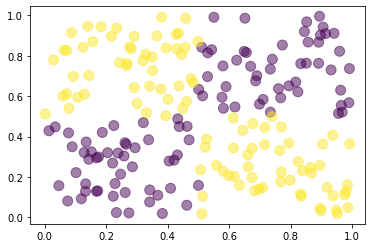

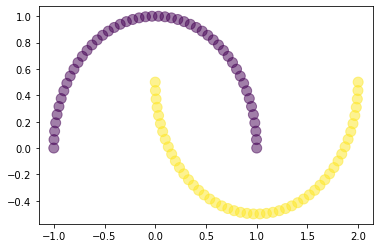

Train accuracy: 1.0


In [7]:
from sklearn.datasets import make_moons

def get_moons():
    X, Y = make_moons(n_samples=100, random_state=42)
    return X, Y

def get_data2():
    width = 12
    height = 12
    N = width * height
    X = np.zeros((N, 2))
    Y = np.zeros(N)
    n = 0
    start_t = 0
    for i in range(width):
        t = start_t
        for j in range(height):
            X[n] = [i, j]
            Y[n] = t
            n += 1
            t = (t + 1) % 2 # alternate between 0 and 1
        start_t = (start_t + 1) % 2
    return X, Y

def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

X, Y = get_donut()
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

X, Y = get_xor()
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

X, Y = get_moons()
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# get the accuracy
model = KNN(3)
model.fit(X, Y)
print("Train accuracy:", model.score(X, Y))

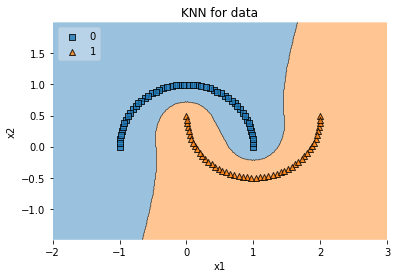

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y, clf=model, legend=2)

# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('KNN for data')
plt.show()